### NLP Natural Disaster tweet classifier

<div size=50% ><b><i>Lorenzo Reinoso Fuentes   --     mail: loloreinoso03@gmail.com</b><i></div>                   
<div size=50%>0212511 UP</div>

In [37]:
# dependencies, all files and libraries needes to run the proyect Python
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
df_Original =  pd.read_csv("tweet_disaster.csv")
df = df_Original[['text','target']].copy()
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [38]:
def pre_processing(texto):
    resultado = texto.lower()
    lemmatizer = WordNetLemmatizer()
    stop_words_en = stopwords.words("English")
    stop_words_en.append("u")
    resultado = re.sub(r"(@[A-Za-z0-9_]+)|((https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*))|([^A-Za-z0-9 \-\t])", "", resultado)
    resultado = re.sub(r"(\s\s\s)|(\s\s)|(\-)|(\t)", " ", resultado) 
    resultado = word_tokenize(resultado)
    resultado = [lemmatizer.lemmatize(word) for word in resultado]
    resultado = [token for token in resultado if token not in stop_words_en]
    resultado = " ".join(resultado)

    return resultado

In [39]:
# Mapp 1 to "real disaster" and 0 to "not-real disaster"
mapper = {
    1:"real disaster",
    0:"not-real disaster"
}
df["target"] = df["target"].map(mapper)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,real disaster
1,Forest fire near La Ronge Sask. Canada,real disaster
2,All residents asked to 'shelter in place' are ...,real disaster
3,"13,000 people receive #wildfires evacuation or...",real disaster
4,Just got sent this photo from Ruby #Alaska as ...,real disaster


In [40]:
# Create a new column with the processed text 
df["clean_text"] = df["text"].apply(pre_processing)

In [44]:
# Word cloud code for Real values and not real, the code can be adapted to fit a desired IMG, and it can be adjusted fro the colors and the size of the strings(nmgram)
def Word_cloud_doble(df,image, n_gram = 1, estilo = "viridis"):
    cloud_T = "".join(df[df["target"]=="real disaster"]["clean_text"])
    cloud_F = "".join( df[df["target"]=="not-real disaster"]["clean_text"])
    mask = np.array(Image.open(image))
    def generate_wordcloud(cloud_text, title, position):
        vocab = []
        for ngram in ngrams(word_tokenize(cloud_text), n_gram):
            resultado = " ".join(ngram)
            vocab.append(resultado)
        result_word = dict(pd.Series(vocab).value_counts())

        wordcloud = WordCloud(
            width=600,
            height=600,
            colormap=estilo,
            background_color="black",
            mask=mask,
            min_font_size=6
        ).generate_from_frequencies(result_word)

        plt.subplot(1, 2, position)
        plt.imshow(wordcloud)
        plt.title(title, fontsize=16)
        plt.axis("off")

    plt.figure(figsize=(12, 6))
    generate_wordcloud(cloud_T, "real disaster", 1)
    generate_wordcloud(cloud_F, "Not-real disaster", 2)

    plt.tight_layout()
    plt.show()

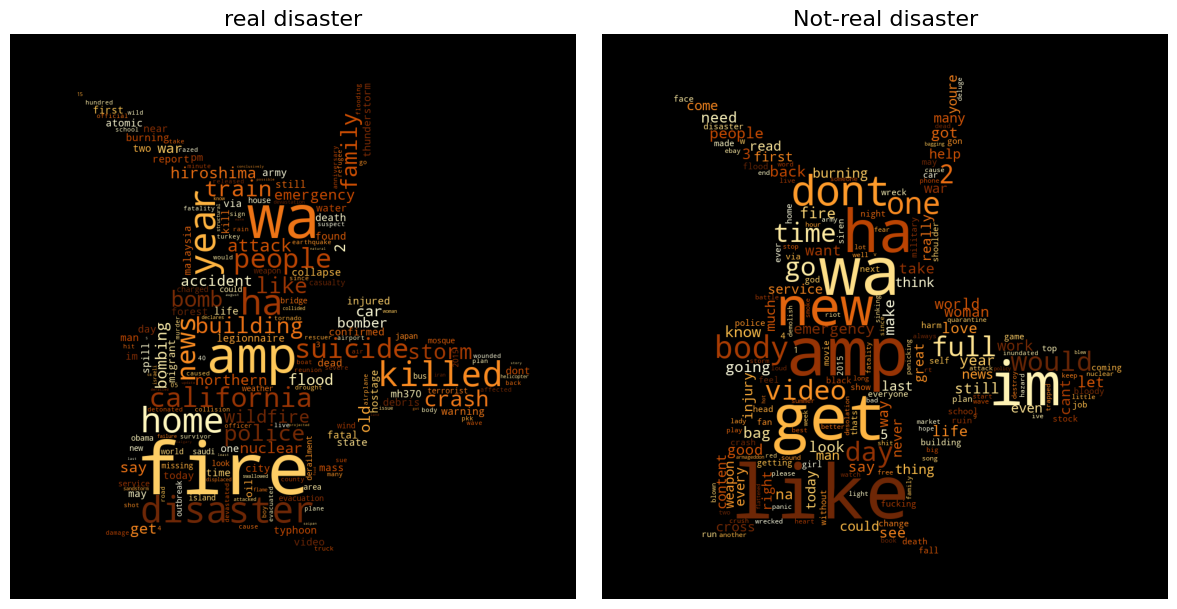

In [47]:
Word_cloud_doble(df,"disaster.jpeg",1,"YlOrBr")

In [36]:
# Word cloud code
def Word_cloud_doble(df,image, n_gram = 1, estilo = "viridis"):
    cloud_T = "".join(df[df["target"]=="real disaster"]["clean_text"])
    cloud_F = "".join( df[df["target"]=="not-real disaster"]["clean_text"])
    mask = np.array(Image.open(image))
    def generate_wordcloud(cloud_text, title, position):
        vocab = []
        for ngram in ngrams(word_tokenize(cloud_text), n_gram):
            resultado = " ".join(ngram)
            vocab.append(resultado)
        result_word = dict(pd.Series(vocab).value_counts())

        wordcloud = WordCloud(
            width=600,
            height=600,
            colormap=estilo,
            background_color="black",
            mask=mask,
            min_font_size=6
        ).generate_from_frequencies(result_word)

        plt.subplot(1, 2, position)
        plt.imshow(wordcloud)
        plt.title(title, fontsize=16)
        plt.axis("off")

    plt.figure(figsize=(12, 6))
    generate_wordcloud(cloud_T, "real disaster", 1)
    generate_wordcloud(cloud_F, "Not-real disaster", 2)

    plt.tight_layout()
    plt.show()

NameError: name 'Image' is not defined